In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.applications.xception import Xception
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential

In [2]:
def preprocess_data(X, Y):
	X_p = keras.applications.xception.preprocess_input(X)
	Y_p = keras.utils.to_categorical(Y)
	return X_p, Y_p

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

model_xception = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)

inp = keras.Input(shape=(32, 32 ,3))
inp_resized = keras.layers.Lambda(lambda X: tf.image.resize(X, (299, 299)))(inp)

X = model_xception(inp_resized, training=False)
X = Flatten()(X)
X = Dense(256, activation='relu')(X)
X - Dropout(0.5)(X)
outputs = Dense(10, activation='softmax')(X)
model = keras.Model(inp, outputs)
model_xception.trainable = False
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
result = model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
1563/1563 [==============================] - 3860s 2s/step - loss: 0.0933 - accuracy: 0.8619 - val_loss: 0.0723 - val_accuracy: 0.8705
Epoch 2/2
1563/1563 [==============================] - 4276s 3s/step - loss: 0.0419 - accuracy: 0.9287 - val_loss: 0.0711 - val_accuracy: 0.8784


In [8]:
htr = result.history
loss = htr['loss']
val_loss = htr['val_loss']
accuracy = htr['accuracy']
val_accuracy = htr['val_accuracy']
epochs = range(1, len(accuracy) + 1)

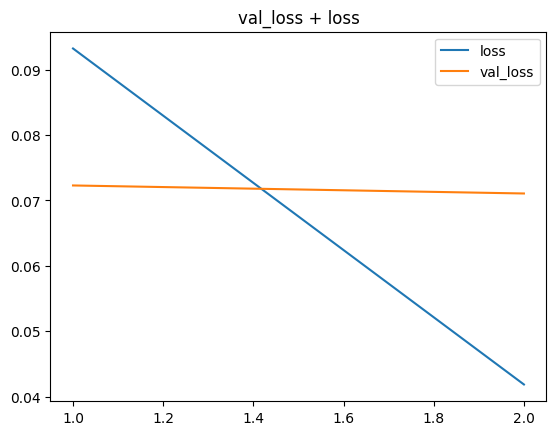

In [9]:
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('val_loss + loss')
plt.legend()
plt.show()

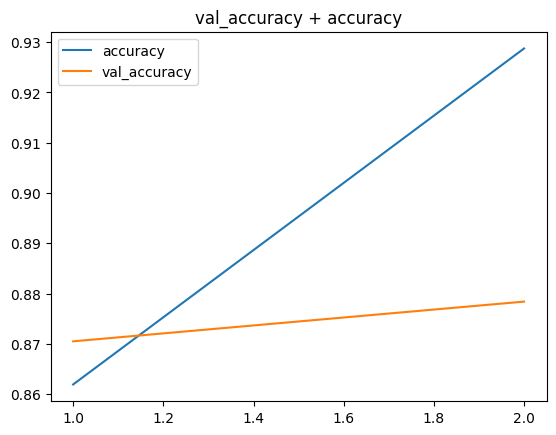

In [10]:
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('val_accuracy + accuracy')
plt.legend()
plt.show()